In [1]:
import import_ipynb
%run utils.ipynb


In [2]:
# Load the datasets
folder_path = "./CICIDS_2019/"
train_data, val_data, test_data = load_and_explore_datasets(folder_path)


Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417306 entries, 0 to 6417305
Data columns (total 59 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Flow Duration             int64  
 1   Total Fwd Packets         int64  
 2   Total Backward Packets    int64  
 3   Fwd Packets Length Total  float64
 4   Bwd Packets Length Total  float64
 5   Fwd Packet Length Max     float64
 6   Fwd Packet Length Mean    float64
 7   Fwd Packet Length Std     float64
 8   Bwd Packet Length Max     float64
 9   Bwd Packet Length Mean    float64
 10  Bwd Packet Length Std     float64
 11  Flow Bytes/s              float64
 12  Flow Packets/s            float64
 13  Flow IAT Mean             float64
 14  Flow IAT Std              float64
 15  Flow IAT Max              float64
 16  Flow IAT Min              float64
 17  Fwd IAT Total             float64
 18  Fwd IAT Mean              float64
 19  Fwd IAT Std               float64
 20  Fwd IAT M

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test, le, scaler, labels = preprocess_data(train_data, val_data, test_data)


Unique labels in train data: ['Benign' 'DoS-Hulk' 'DDoS-LOIC-HTTP' 'DDoS' 'DoS-Goldeneye' 'DDoS-HOIC'
 'Infiltration' 'DDoS-TFTP' 'DDoS-MSSQL' 'Botnet' 'DDoS-NTP'
 'DoS-Slowhttptest' 'DDoS-Syn' 'DDoS-UDPLag' 'Bruteforce-SSH'
 'DoS-Slowloris' 'DDoS-UDP' 'Bruteforce-FTP' 'Webattack-bruteforce'
 'Portscan' 'DDoS-NetBIOS' 'DDoS-DNS' 'DDoS-Slowloris' 'DDoS-Ddossim'
 'DoS-Slowread' 'Webattack-XSS' 'DDoS-SNMP' 'DoS-Slowheaders'
 'DoS-Slowbody' 'DoS-Rudy' 'DDoS-LDAP' 'Webattack-SQLi' 'DoS-Heartbleed']
Unique labels in validation data: ['DDoS-LOIC-HTTP' 'Benign' 'DDoS-HOIC' 'DDoS-NTP' 'Botnet' 'DDoS-TFTP'
 'DDoS-DNS' 'DoS-Hulk' 'DDoS' 'DDoS-UDP' 'DDoS-Ddossim' 'Infiltration'
 'Bruteforce-SSH' 'DDoS-MSSQL' 'DoS-Slowloris' 'DoS-Goldeneye' 'DDoS-Syn'
 'DoS-Slowhttptest' 'DDoS-UDPLag' 'Webattack-bruteforce' 'DoS-Slowheaders'
 'DDoS-Slowloris' 'Bruteforce-FTP' 'DoS-Slowread' 'DDoS-SNMP' 'Portscan'
 'DDoS-LDAP' 'Webattack-XSS' 'DoS-Rudy' 'DDoS-NetBIOS' 'DoS-Slowbody'
 'Webattack-SQLi' 'DoS-Heartbleed

C:\Users\Monet\AppData\Local\Temp\ipykernel_14304\432265042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


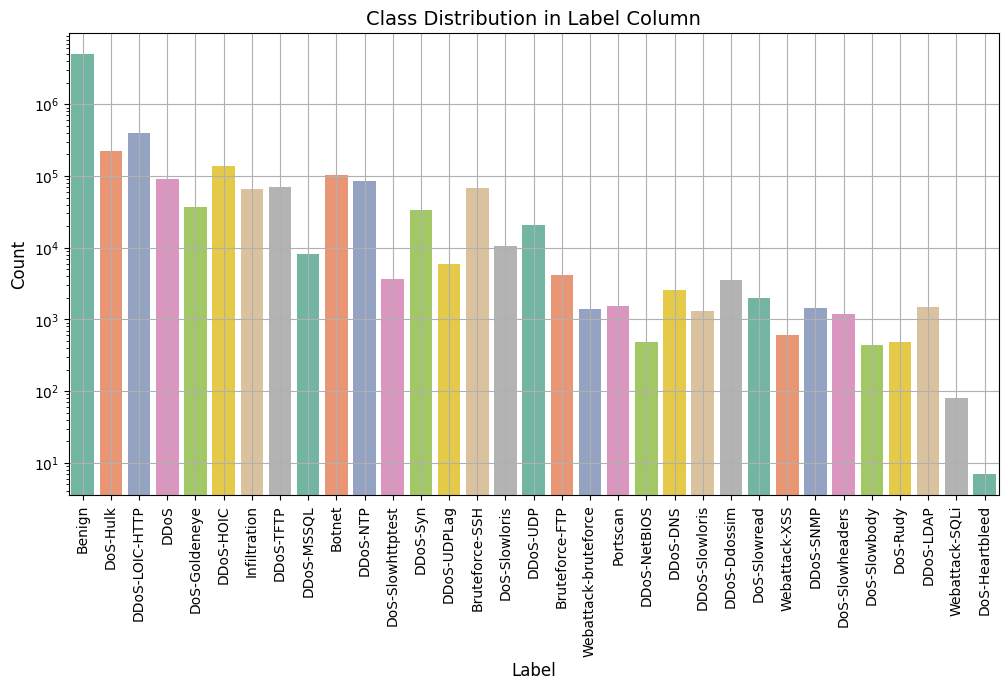

In [4]:
def plot_class_distribution_(data, column='Label'):
    plt.rcParams.update({'font.size': 8})
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=data, palette='Set2')
    plt.title(f"Class Distribution in {column} Column", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tick_params(axis='both', labelsize=10)
    plt.yscale('log')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

plot_class_distribution_(train_data)


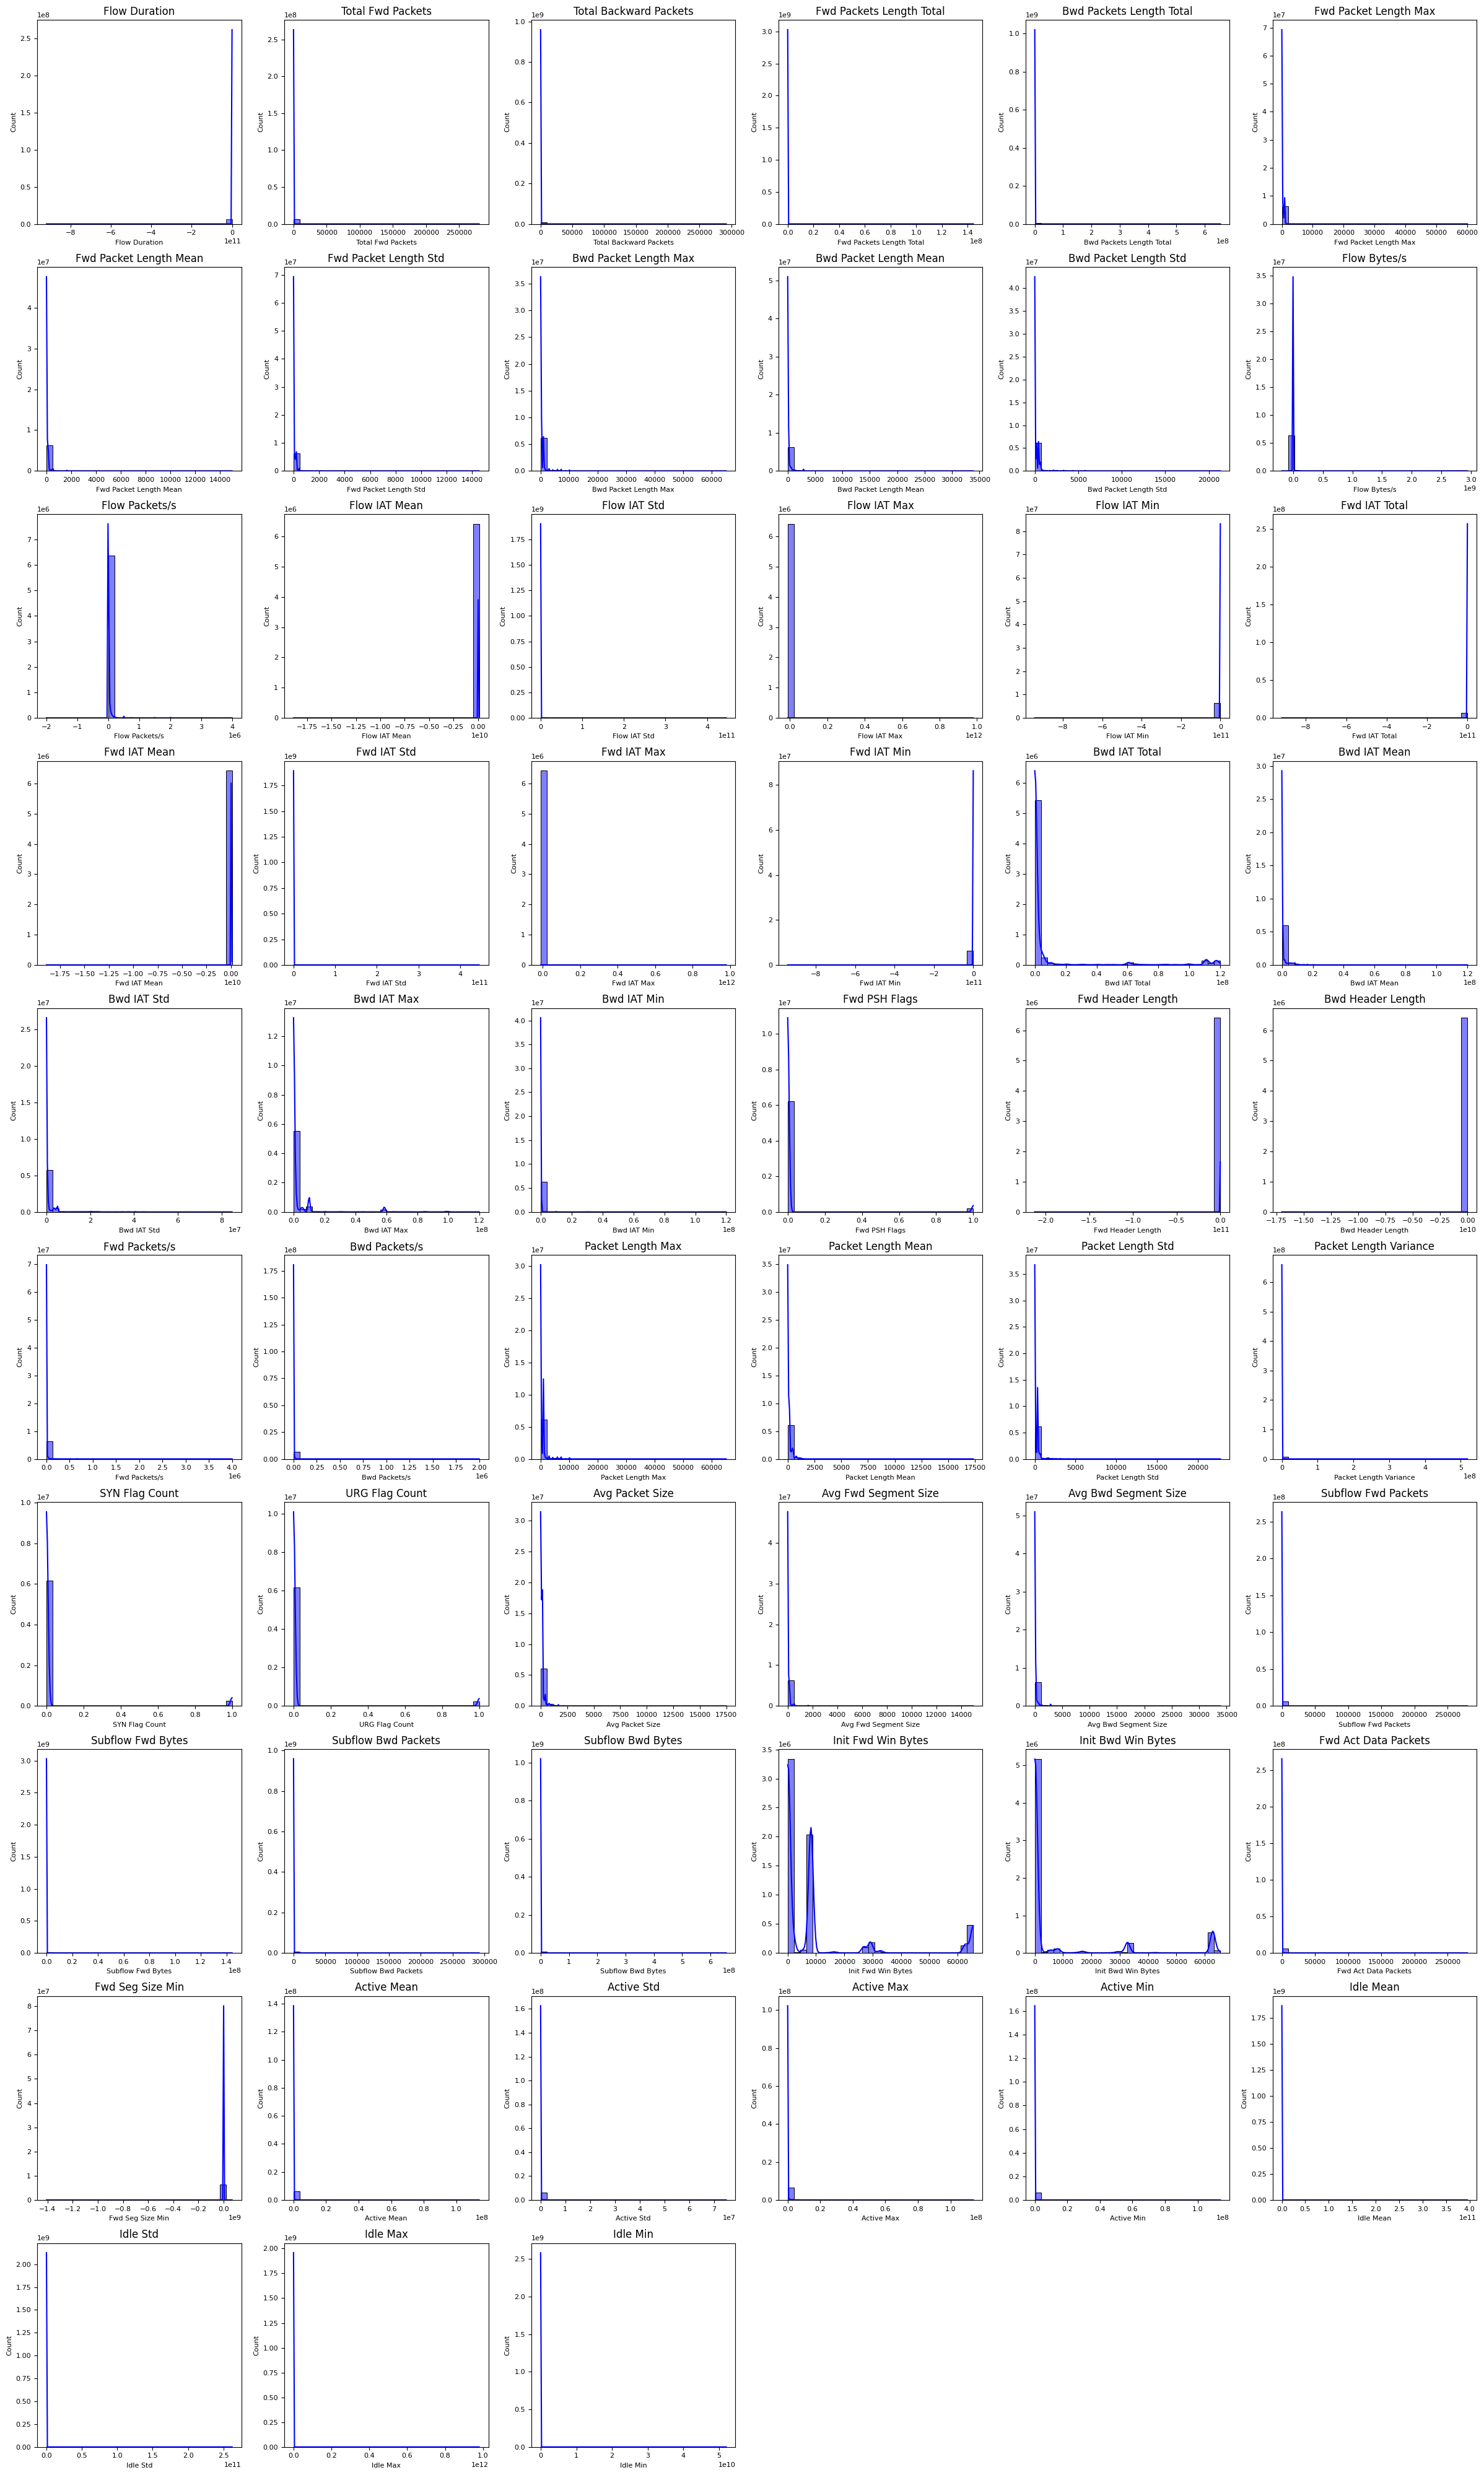

In [5]:
def plot_numeric_feature_distribution(data, numeric_features, cols=6):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    rows = (len(numeric_features) + cols - 1) // cols
    plt.figure(figsize=(cols * 4, rows * 4))
    
    for idx, feature in enumerate(numeric_features, 1):
        plt.subplot(rows, cols, idx)
        sns.histplot(data[feature], kde=True, bins=30, color='blue')
        plt.title(feature, fontsize=12)
        plt.tight_layout()
    
    plt.show()
    
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
plot_numeric_feature_distribution(train_data, numeric_features, cols=6)


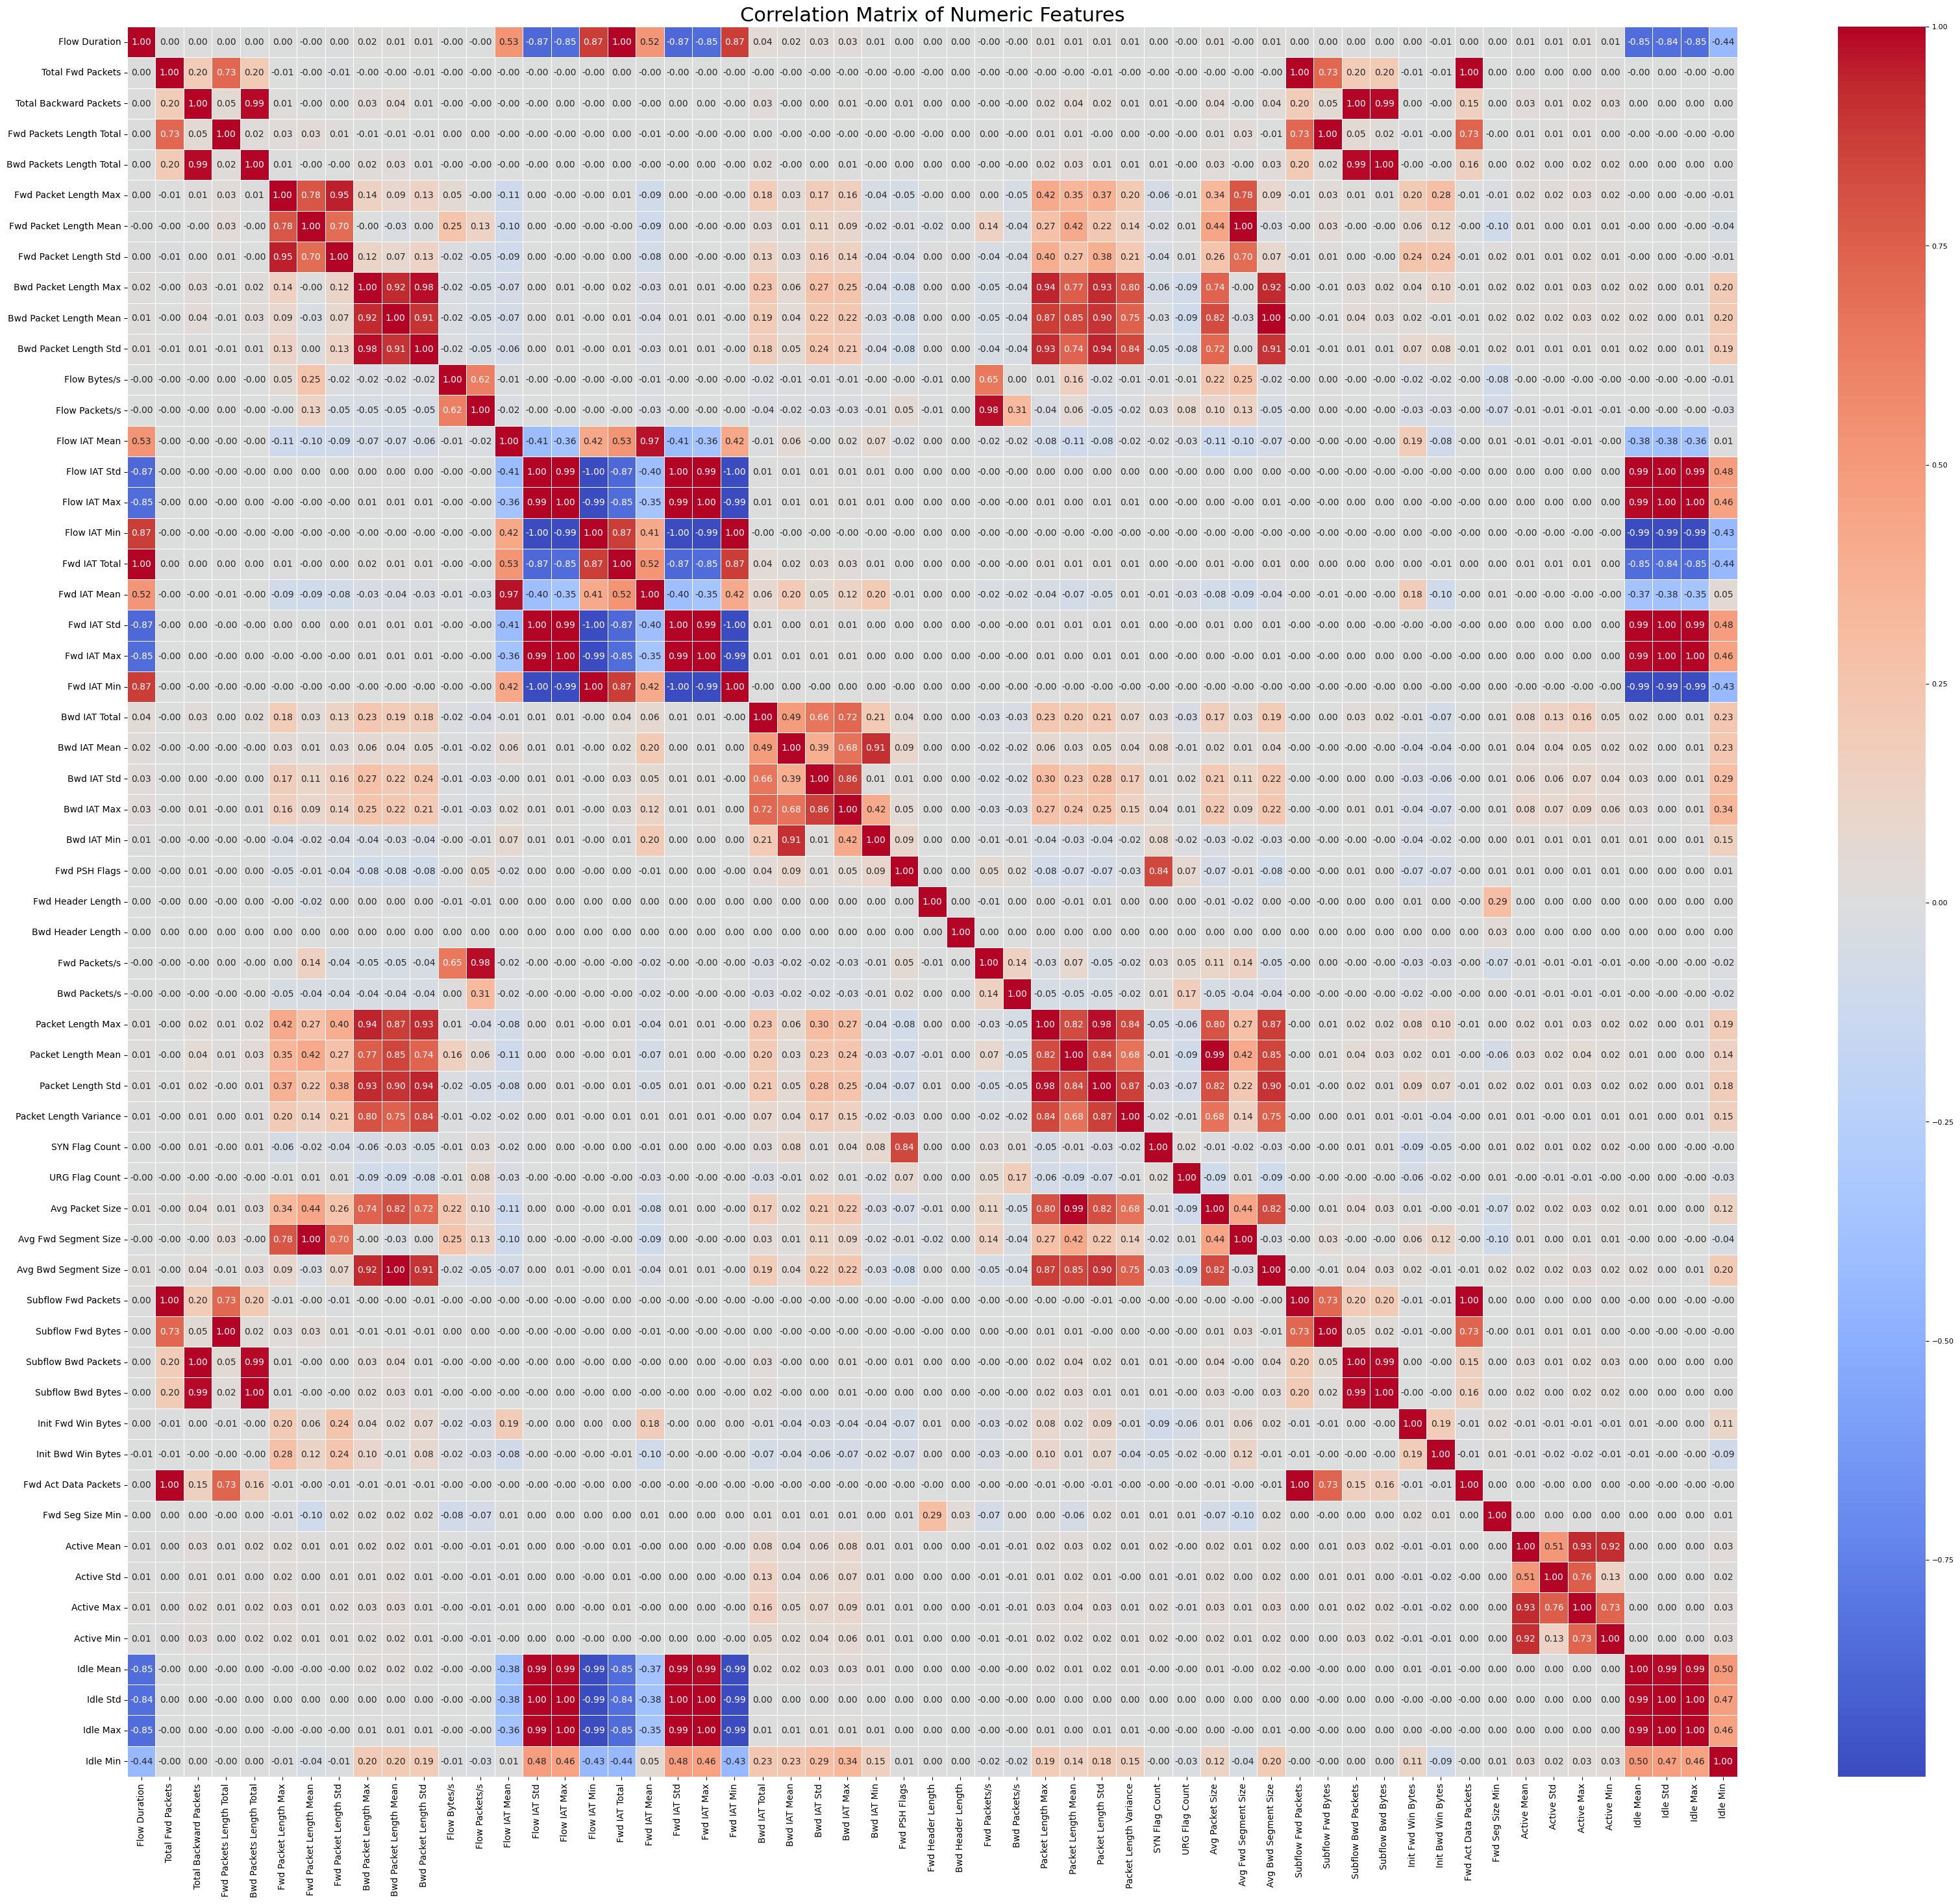

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(data, numeric_features):
    correlation_matrix = data[numeric_features].corr()
    plt.figure(figsize=(45, 40))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size":12})

    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.title("Correlation Matrix of Numeric Features", fontsize=22)
    plt.show()

plot_correlation_matrix(train_data, numeric_features)